In [1]:
import numpy as np
import pulp as plp
import random
import matplotlib.pyplot as plt
import time
import networkx as nx

In [2]:
from collections import Counter

In [3]:
def Create_Points(n,m,plot=False,base="star"):
    
    a = 2
    
    #basis = np.array([[0,0],[a/2,0],[a/4,np.sqrt(3)/2],[0,np.sqrt(3)],[a/2,np.sqrt(3)]])
    #basis2 = np.array([[0,0],[a/2,0],[a/4,np.sqrt(3)/2]])
    #basis3 = np.array([[a/4,np.sqrt(3)/2],[0,np.sqrt(3)],[a/2,np.sqrt(3)]])
    
    triangle_basis = np.array([[0,0],[a/2,0],[a/4,np.sqrt(3)/2]])

    hexagon_basis = np.array([[a/4,np.sqrt(3)/2],[a/2,np.sqrt(3)]
                    ,[a,np.sqrt(3)],[a,0],[a/2,0],
                    [5*1/4*a,np.sqrt(3)/2]])

    star_basis = np.array([[0,0],[a/2,0],[a/4,np.sqrt(3)/2],[0,np.sqrt(3)],[a/2,np.sqrt(3)],
                     [3/4*a,3/2*np.sqrt(3)],[a,np.sqrt(3)],[a,0],
                     [3/4*a,-np.sqrt(3)/2],
                     [3/2*a,0],[3/2*a,np.sqrt(3)],
                     [5*1/4*a,np.sqrt(3)/2]])
    if base == "triangle":
        basis = triangle_basis
    
    if base == "hexagon":
        basis = hexagon_basis
    if base == "star":
        basis = star_basis
    
    vec = np.array([[a,0],[a/2,a*np.sqrt(3)/2]])
    
    rows=m
    cols=n
    """
    vectors = [(0,0)]
    
    vectors = []
    for i in range(0,n+1):
         vectors.append((i,0))
    for i in range(1,n+1):
         vectors.append((i,-1))     
    for i in range(0,n):
         vectors.append((i,1))
    """        

    points=[]
    
    vectors=[(j,i) for i in range(0,rows) for j in range(0,cols)]
    """
    vectors = [(0,-1),(1,-1),
              (0,0),(1,0),
              (0,1),(1,1)]
    """
    vectors = sorted(vectors,key=lambda l:l[1])
    
    #print(vectors)
    
    for v in vectors:
        point = basis + v[0]*vec[0,:] + v[1]*vec[1,:]
        points.append(point)  
     
    points=np.array(points)

    POINTS= []
    for v in points:
        for a,b, in v:
            POINTS.append([a,b])

    lista = np.unique(np.round(POINTS,7), axis=0)
          
    #############################################################################
    
    if plot==True:
        fig, ax = plt.subplots(figsize=(10,10))
        x, y = np.array(lista).T

        ax.scatter(x,y)
        
        for i in range(-100,100):
            plt.axline((i, 0), slope=np.sqrt(3), color="black",alpha=0.3,linestyle='--', linewidth='1') #linestyle=(0, (5, 5)))
        for i in range(-100,100):
            plt.axline((i, 0), slope=-np.sqrt(3), color="black",alpha=0.3,linestyle='--', linewidth='1') #linestyle=(0, (5, 5)))
        for i in range(-100,100):
            plt.axline((0, np.sqrt(3)/2*i), slope=0,color="black",alpha=0.3,linestyle='--', linewidth='1')

        ax.set_xlim(xmin=min(x)-n,xmax=max(x)+n)
        ax.set_ylim(ymin=min(y)-n,ymax=max(y)+n)
        plt.grid(alpha=0.3)
        
        plt.show()
    
    #############################################################################
    
    return lista

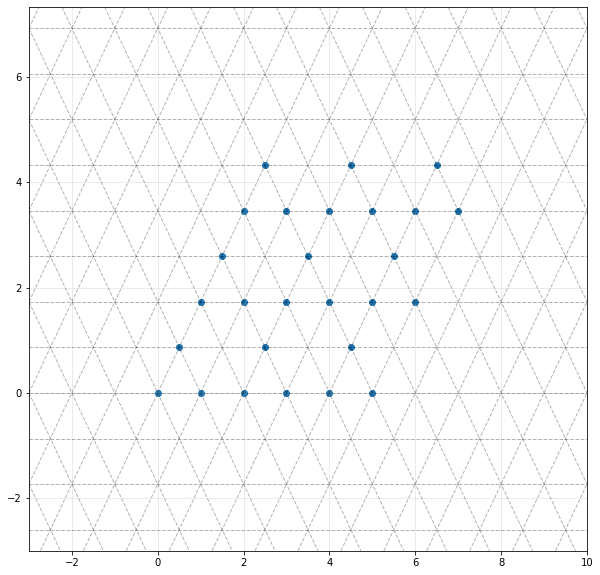

In [4]:
points = Create_Points(3,3,plot=True,base="triangle")

In [5]:
def Create_Kagome_Graph(n,m,p=0.0,plot=False):
    
    points = Create_Points(n,m,plot=False,base="star")
    
    N = len(points)
    
    points = sorted(points,key=lambda l:l[1])
    
    ############################################################################
    G = nx.Graph()
    G.add_nodes_from([i for i in range(0,N)])
    
    dic={}  
    for n,(x,y) in zip(G.nodes(),points):
        dic[n] = (x,y)
    #############################################################################    
    for node in G.nodes():
        if (node)+1 in G.nodes():
            G.add_edge((node),node+1)

    remove=[]
    for (e1,e2),(index,(x,y)) in zip(G.edges(),enumerate(points)):
        try:
            if (points[index][1] != points[index+1][1]) or np.sqrt((points[index+1][0] - points[index][0])**2 + (points[index+1][1] - points[index+1][1])**2)>1:
                remove.append((e1,e2))
        except IndexError:
            print("do what needs to be done in this case")
    
    G.remove_edges_from(remove)

    remove=[]
    maxs = max((np.count_nonzero(points == y, axis=0))[1] for x,y in points)
    for node in G.nodes():
        for i in range(2,maxs+1):
            if (node)+i in G.nodes():
                if np.round(np.sqrt((dic[node+i][0] - dic[node][0])**2 + (dic[node+i][1] - dic[node][1])**2),2) <= 1:#np.sqrt(3)/4:
                    G.add_edge((node),node+i)
                    
    #####################################################################################                

    nukem=[]
    addem=[]
    for node in G.nodes():
        for edge in nx.edges(G,node):
            r = random.uniform(0, 1)
            if r<=p:
                nukem.append(edge)
                    
                new_node =(random.randint(0,N-1))    
                
                if new_node in G.nodes() and new_node!=node:
                    addem.append((node,new_node))
                else:
                    while new_node not in G.nodes() and new_node!=node:
                        new_node =(random.randint(0,N-1))  
                addem.append((node,new_node))
            
    G.remove_edges_from(nukem)
    G.add_edges_from(addem)
    
    ###########################################################################################   
    if plot == True:
        pos = {k: v for k,v in zip(G.nodes(), points)}
        fig, ax = plt.subplots(figsize=(8,8))
        nx.draw_networkx(G,pos=pos,node_size=1,with_labels=False,node_color="red")
    ###################################################################################### 
    
    return G,points

# LATTICE

In [6]:
def my_path_graph(n):
    
    G = nx.Graph()

    G.add_nodes_from(range(n))
    
    for v in range(n-1):
        G.add_edge((v),(v+1),weight=0)
    
    return G

def my_grid_graph(dim):

    colors=[]
    dim=list(dim)
    current_dim=dim.pop()
    G=my_path_graph(current_dim)

    
    while len(dim)>0:
        current_dim=dim.pop()
        Gold=G.copy()
        Gnew=my_path_graph(current_dim)

        G=nx.cartesian_product(Gnew,Gold)

    H=nx.relabel_nodes(G, nx.utils.flatten)

    return H

In [7]:
def Create_Data(matrices):

    signed_matrices=[]
    unsigned_matrices=[]
    weights = []
    graphs=[]
    for signed_matrix in matrices:

        Graph=nx.from_numpy_matrix(signed_matrix)

        mapping=dict(zip(Graph.nodes(),range(len(Graph.nodes()))))
        Graph=nx.relabel_nodes(Graph,mapping) 

        graphs.append(Graph)

        signed_matrix = nx.to_numpy_matrix(Graph)
        unsigned_matrix = abs(signed_matrix)    

        weighted_edges=nx.get_edge_attributes(Graph, 'weight') 
        w={}
        for (u,v) in weighted_edges:
            if u<v:
                w[(u,v)] = weighted_edges[(u,v)]
            if u>v:
                w[(v,u)] = weighted_edges[(u,v)]

        signed_matrices.append(signed_matrix)
        unsigned_matrices.append(unsigned_matrix)
        weights.append(w)

    return graphs, weights, signed_matrices

# ALGORITHM

In [8]:
def XOR_Model(graphs, weights, signed_matrix):

    objectivevalue=[]
    objs=[]
    solveTime=[]
    
    run = len(graphs)
    
    speedupParam=int(1)
    
    for index in range(run):
      
        ##############################################################
        
        order=len(signed_matrix[index])
        negative_edges=((-1 == signed_matrix[index])).sum()/2
        size=int(np.count_nonzero(signed_matrix[index])/2)

        neighbors={}
        Degree=[]
        for u in sorted((graphs[index]).nodes()):
            neighbors[u] = list((graphs[index])[u])
            Degree.append(len(neighbors[u]))
        unsignedDegree=Degree
        
        #Finding the node with the highest unsigned degree
        maximum_degree = max(unsignedDegree)
        [node_to_fix]=[([i for i, j in enumerate(unsignedDegree) if j == maximum_degree]).pop()]
        
        GraphTriangles=[]
        for n1 in sorted((graphs[index]).nodes()):
            neighbors1 = set((graphs[index])[n1])
            for n2 in filter(lambda x: x>n1, neighbors1):
                neighbors2 = set((graphs[index])[n2])
                common = neighbors1 & neighbors2
                for n3 in filter(lambda x: x>n2, common):
                    GraphTriangles.append([n1,n2,n3])
                    
        w=nx.get_edge_attributes(graphs[index], 'weight')  
        unbalanced_triangles = []
        balanced_triangles = []
        for triad in GraphTriangles: 
            if  (weights[index])[(triad[0],triad[1])]*\
            (weights[index])[(triad[0],triad[2])]*(weights[index])[(triad[1],triad[2])] == -1:
                unbalanced_triangles.append(triad)
            elif (weights[index])[(triad[0],triad[1])]*\
            (weights[index])[(triad[0],triad[2])]*(weights[index])[(triad[1],triad[2])] == 1:
                balanced_triangles.append(triad)  
        
        ##############################################################
        
        order=len(signed_matrix[index])
        
        opt_model = plp.LpProblem(name="Binary_Model",sense = plp.LpMinimize)

        x=[]
        for i in range(0,order):
            x.append(plp.LpVariable(lowBound=0,upBound=1, cat=plp.LpBinary, name='x'+str(i)))

        z={}    
        for (i,j) in (weights[index]):
            z[(i,j)]=plp.LpVariable(lowBound=0,upBound=1, cat=plp.LpBinary, name='z'+str(i)+','+str(j))
        
        OFV = 0
        for (i,j) in (weights[index]):
            OFV += z[(i,j)]
            
        opt_model.setObjective(OFV)
                    
        for (i,j) in (weights[index]):
            opt_model.addConstraint( z[(i,j)] >= x[i] - ((weights[index])[(i,j)])*x[j] -\
                            (1-(weights[index])[(i,j)])/2)
            opt_model.addConstraint( z[(i,j)] >= -x[i] + ((weights[index])[(i,j)])*x[j] +\
                            (1-(weights[index])[(i,j)])/2)   
                    
        ###############################################################################################
    
        if speedupParam==1:
            
            lazyTriangles=int(2)

            if lazyTriangles == 2:
                triangleInequalityCount=len(unbalanced_triangles)
                for triangle in unbalanced_triangles:
                    [i,j,k]=triangle
                    opt_model.addConstraint(z[(i,j)] + z[(i,k)] + z[(j,k)] >= 1)
                    
            elif lazyTriangles == 3:
                triangleInequalityCount=0

            # Colour the node with the highest degree as 1
            opt_model.addConstraint(x[node_to_fix]==1)   
        
        #####################################################################################

        #for runda in range(10):
        
        #print("starting solver")
                    
        start_time = time.time()
        status = opt_model.solve(solver = plp.getSolver('GUROBI_CMD'))#'COIN_CMD'))
        solveTime.append(time.time() - start_time) 
        
        #print("solve time",solveTime[index])

        #print("object=",opt_model.objective.value())
        
        obj = float(opt_model.objective.value())
        objectivevalue.append((obj))
            
        #objs.append((np.mean(objectivevalue),np.std(objectivevalue)))        
                    
    return objectivevalue, solveTime

# MODIFY GRAPH

In [9]:
def Rewire_Grid0(option,G,p):
    #print("enter rewire")
    
    if option == "Grid" or option == "Triangle":
    
        nukem=[]
        addem=[]
        xmaks = (max(G.nodes())[0])
        ymaks = (max(G.nodes())[1])
        for node in G.nodes():
            #print("stari",node)
            for edge in nx.edges(G,node):
                r = random.uniform(0, 1)
                if r<=p:
                    nukem.append(edge)

                    x = random.randint(0,xmaks)
                    #print(x)
                    y = random.randint(0,ymaks)
                    #print(y)
                    new_node = (x,y)
                    #print("new",new_node)

                    if new_node in G.nodes() and new_node!=node:
                        #print("dodajem")
                        addem.append((node,new_node))
                    else:
                        #print("nije uspio odmah")
                        while new_node not in G.nodes() and new_node!=node:
                            x = random.randint(0,xmaks)
                            y = random.randint(0,ymaks)
                            new_node=(x,y)
                    addem.append((node,new_node))

        #print("removing")
        G.remove_edges_from(nukem)
        #print("adding")
        G.add_edges_from(addem)
        #print("exit rewire")
    
    else:
        
        maks = max(G.nodes())
        
        nukem=[]
        addem=[]
        for node in G.nodes():
            for edge in nx.edges(G,node):
                r = random.uniform(0, 1)
                if r<=p:
                    nukem.append(edge)

                    new_node =(random.randint(0,maks-1))    

                    if new_node in G.nodes() and new_node!=node:
                        addem.append((node,new_node))
                    else:
                        while new_node not in G.nodes() and new_node!=node:
                            new_node =(random.randint(0,maks-1))  
                    addem.append((node,new_node))

        G.remove_edges_from(nukem)
        G.add_edges_from(addem)
        
    
    return G

In [10]:
def find_duplicate_edges(edges):
    graph = nx.Graph()
    for n1, n2 in edges:
        if graph.has_node(n1) and graph.has_node(n2) and nx.has_path(graph, n1, n2):
            yield n1, n2
        else:
            graph.add_edge(n1, n2)

In [11]:
def Rewire_Grid(option,G,p):
    #print("before",len(G.edges()))
        
    if option == "Grid" or option == "Triangle":   
        
        nukem=[]
        addem=[]
        xmaks = (max(G.nodes())[0])
        ymaks = (max(G.nodes())[1])
        
        for a,b in G.edges():
            r = random.uniform(0, 1)
            if r<=p:
                nukem.append((a,b))
                
                n1 = (random.randint(0,xmaks),random.randint(0,ymaks))
                n2 = (random.randint(0,xmaks),random.randint(0,ymaks))
            
                #if (n1,n2) not in G.edges() and (n1,n2) != edge:
                        #addem.append((n1,n2))
                #else:
                #while ((n1,n2) not in G.edges()) and ((n1,n2) != edge):
                while ((n1,n2) in G.edges()) or ((n1,n2)==(a,b) or (n1,n2)==(b,a)) or ((n1,n2) in addem or (n2,n1) in addem) or (n1 not in G.nodes()) or (n2 not in G.nodes()):# or ((n1,n2)==(a,b) or (n1,n2)==(b,a)) or ((n1,n2) in addem):
                
                        n1 = (random.randint(0,xmaks),random.randint(0,ymaks))
                        n2 = (random.randint(0,xmaks),random.randint(0,ymaks))
                        
                addem.append((n1,n2))
        
        G.remove_edges_from(nukem)
        G.add_edges_from(addem)
        
    else:
        
        maks = max(G.nodes())
        
        nukem=[]
        addem=[]
        
        for a,b in G.edges():
            r = random.uniform(0, 1)
            if r<=p:
                
                n1 =(random.randint(0,maks))
                n2 =(random.randint(0,maks))

                if ((n1,n2) not in G.edges()) and ((n1,n2)!=(a,b) and (n1,n2)!=(b,a)) and ((n1,n2) not in addem and (n2,n1) not in addem):
                
                    nukem.append((a,b))
                    addem.append((n1,n2))
                    
                else:
                    while ((n1,n2) in G.edges()) or ((n1,n2)==(a,b) or (n1,n2)==(b,a)) or ((n1,n2) in addem or (n2,n1) in addem):# or ((n1,n2)==(a,b) or (n1,n2)==(b,a)) or ((n1,n2) in addem):

                        n1 =(random.randint(0,maks))
                        n2 =(random.randint(0,maks))

                    nukem.append((a,b))
                    addem.append((n1,n2))
                
        G.remove_edges_from(nukem)
        
        """
        for index,(a,b) in enumerate(addem):
            print(index,(a,b))
            ln = len(G.edges())
            G.add_edge(a,b)
            if ln == len(G.edges()):
                print("ovdje je krivo")
                print([(a,b) for a,b in G.edges()])
        """
        G.add_edges_from(addem)
    
    #print("after",len(G.edges()))
    return G

In [13]:
def Add_Weights(H,k):
    
    N = len(H.edges())

    m=int(round(k*N))
    n=int(round((1-k)*N))

    a = np.ones(n+m)
    a[:m] = -1
    np.random.shuffle(a)
    
    dic={}
    for e,value in zip(H.edges(),a):
        dic[e] = value
    
    nx.set_edge_attributes(H, dic,'weight')
    
    return H

## 3) Kagome

52 90
52 90


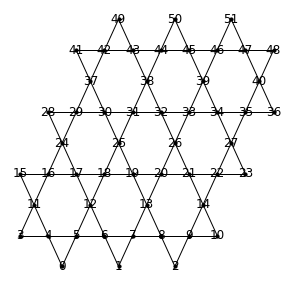

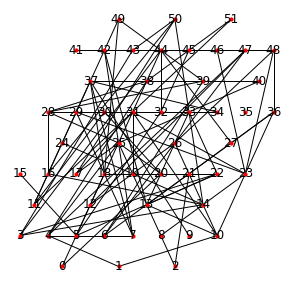

In [14]:
N=3

G,points = Create_Kagome_Graph(N,N,p=0.0)

print(len(G.nodes()),len(G.edges()))

fig, ax = plt.subplots(figsize=(5,5))
nx.draw(G,points,node_size=10,node_color="black",with_labels=True)

G = Rewire_Grid("Kagome",G,1.0)

print(len(G.nodes()),len(G.edges()))

fig, ax = plt.subplots(figsize=(5,5))
nx.draw(G,points,node_size=10,node_color="red",with_labels=True)

G = Add_Weights(G,k=0.5)

#Plot_Colors(G,points)

##  1) Grid Lattice

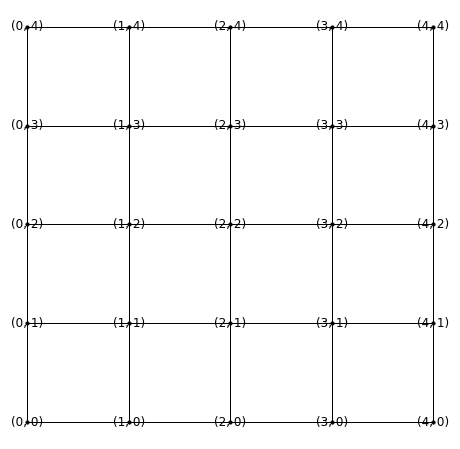

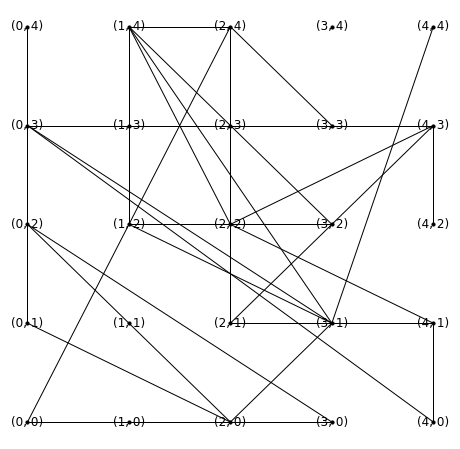

In [15]:

G1 = my_grid_graph(dim=[5,5])


pos1 = dict( (n, n) for n in G1.nodes() )
fig, ax = plt.subplots(figsize=(8,8))
nx.draw(G1,pos1,node_size=10,node_color="black",with_labels=True)


G1 = Rewire_Grid("Grid",G1,0.5)
#pos1 = dict( (n, n) for n in G1.nodes() )
fig, ax = plt.subplots(figsize=(8,8))
nx.draw(G1,pos1,node_size=10,node_color="black",with_labels=True)


G1 = Add_Weights(G1,0.9)
#Plot_Colors(G1,pos1)

# 9.4.

## 2) Triangular Lattice Graph

21
after rewire 21


'\n#pos=nx.spring_layout(G, weight=None)\nfig, ax = plt.subplots(figsize=(5,5))\nnx.draw(G,pos,node_size=10,node_color="red",with_labels=True)\n\nG = Add_Weights(G,0.9)\n'

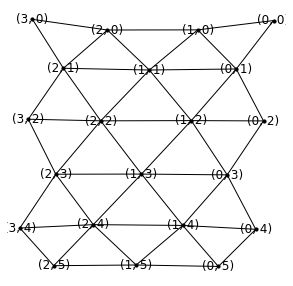

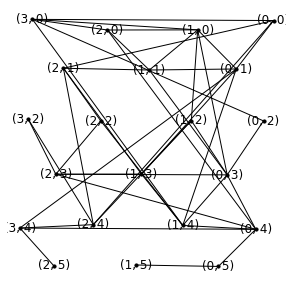

In [16]:
G = nx.triangular_lattice_graph(5,5)

pos=nx.spring_layout(G, weight=None)

print(len(G.nodes()))

fig, ax = plt.subplots(figsize=(5,5))
nx.draw(G,pos,node_size=10,node_color="black",with_labels=True)

G = Rewire_Grid("Triangle",G,0.5)

print("after rewire",len(G.nodes()))

fig, ax = plt.subplots(figsize=(5,5))
nx.draw(G,pos,node_size=10,node_color="black",with_labels=True)

"""
#pos=nx.spring_layout(G, weight=None)
fig, ax = plt.subplots(figsize=(5,5))
nx.draw(G,pos,node_size=10,node_color="red",with_labels=True)

G = Add_Weights(G,0.9)
"""
#Plot_Colors(G,pos)

# CHOOSE GRAPH

In [17]:
def Choose_Graph(option,n,m):
    if option == "Grid":
        
        G = my_grid_graph(dim=[n,n])
        pos = dict((n, n) for n in G.nodes())

    if option == "Triangle":
        
        G  = nx.triangular_lattice_graph(n,m)
        pos = nx.spring_layout(G, weight=None)
        
    if option == "Kagome":
        
        G,pos = Create_Kagome_Graph(n,m)
        
    return G,pos

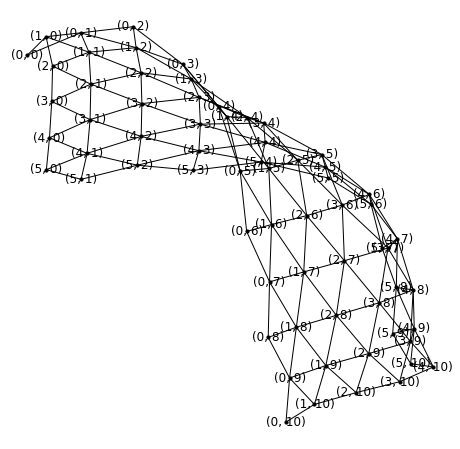

In [18]:
G,pos = Choose_Graph("Triangle",10,10)

fig, ax = plt.subplots(figsize=(8,8))
nx.draw(G,pos,node_size=10,node_color="black",with_labels=True)

In [19]:
def Coloring_Function(option, n, m, repeat = 5, color="red"):
    
    K = np.linspace(0,1)
    
    total=[]
    for index, k in enumerate(K):
        print(index,end=" ")
        results = []
        for numb,i in enumerate(range(repeat)):
            
            #G = create_grid_lattice_graph(size,size,k=k,plot=False)
            
            #G = my_grid_graph(dim=[size,size])
                        
            G,pos = Choose_Graph(option,n,m)
            
            G = Add_Weights(G,k)

            signed_matrix0 = nx.to_numpy_matrix(G)

            graphs, weights, signed_matrices = Create_Data([signed_matrix0])

            objs0,solve_time0 = XOR_Model(graphs, weights, signed_matrices)

            results.append(objs0)
            
        total.append((np.mean(results),np.std(results)))

        
    #color = random.choice(["red","blue","green"])
    fig, ax = plt.subplots(figsize=[8,8])
    ax.errorbar([k for k in K], [i for i,j in total], [j for i,j in total], ls='dotted', marker='^',capsize=10,color=color)
    plt.show()
    
    return total

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

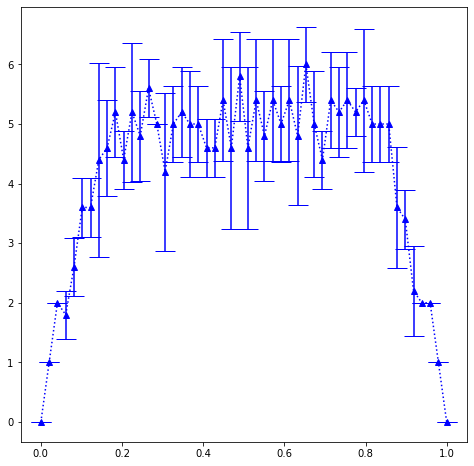

In [15]:
total = Coloring_Function("Grid",5,5,repeat = 5, color="blue")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

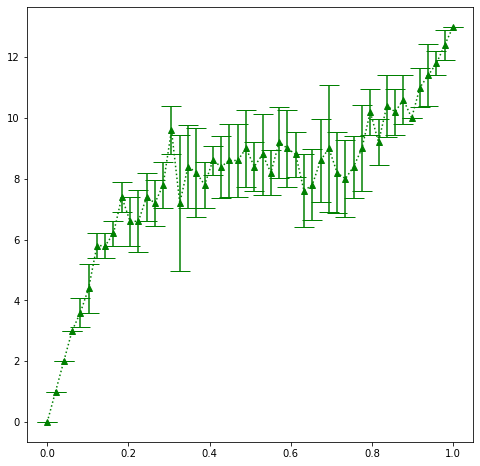

In [14]:
total = Coloring_Function("Triangle",5,5,repeat = 5,color="green")

In [19]:
#total = Coloring_Function("Kagome",5,5,repeat = 5, color="red")

In [20]:
def Rewiring_Fuction(option, n,m , repeat = 5, k=1,color="red"):

    P = np.linspace(0,1)

    total=[]
    
    G0,pos = Choose_Graph(option,n,m)
    edge_number = len(G0.edges())
    node_number = len(G0.nodes())
    print("Number of Nodes:",node_number)
    print("Number of Edges:",edge_number)
    
    """
    fig, ax = plt.subplots(figsize=(5,5))
    nx.draw(G0,pos,node_size=10,node_color="black",with_labels=True)
    """

    for index, p in enumerate(P):
        print(index,end=" ")
        #print("\n",k)
        results = []
        for numb,i in enumerate(range(repeat)):
            #print(numb,end=" ")
            
            #G = my_grid_graph(dim=[size,size])
            
            G,pos = Choose_Graph(option,n,m)
            G = Rewire_Grid(option,G,p)
            G = Add_Weights(G,k)
            
            size = len(G.edges())

            signed_matrix0 = nx.to_numpy_matrix(G)

            graphs, weights, signed_matrices = Create_Data([signed_matrix0])

            objs0,solve_time0 = XOR_Model(graphs, weights, signed_matrices)

            results.append(objs0)

            #print("\nresults=",np.mean(objs0),np.std(objs0))
            #print("time=",np.mean(solve_time0),np.std(solve_time0))
        #total.append((np.mean(results)/size,np.std(results)/size))
        total.append((np.mean(results),np.std(results)))
     
    """
    #print(len(total))
    fig, ax = plt.subplots(figsize=[8,8])
    ax.errorbar([p for p in P], [i for i,j in total], [j for i,j in total], ls='dotted', marker='^',capsize=10,color=color)
    plt.xlabel('Probability of rewiring', fontsize=14)
    plt.ylabel('Frustration index', fontsize=14)
    #ax.set_ylim((0,1))
    plt.show()
    """
    
    return total, node_number, edge_number

In [74]:
grid_data, grid_node, grid_edge = Rewiring_Fuction("Grid",4,4, repeat = 5, k=1.0,color="blue")

Number of Nodes: 16
Number of Edges: 24
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

In [75]:
kagome_data, kagome_node, kagome_edge = Rewiring_Fuction("Kagome",1,1, repeat = 5, k=1.0,color="red")

Number of Nodes: 12
Number of Edges: 18
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

In [76]:
triangle_data, triangle_node, triangle_edge = Rewiring_Fuction("Triangle",4,4, repeat = 5, k=1.0,color="green")

Number of Nodes: 15
Number of Edges: 30
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

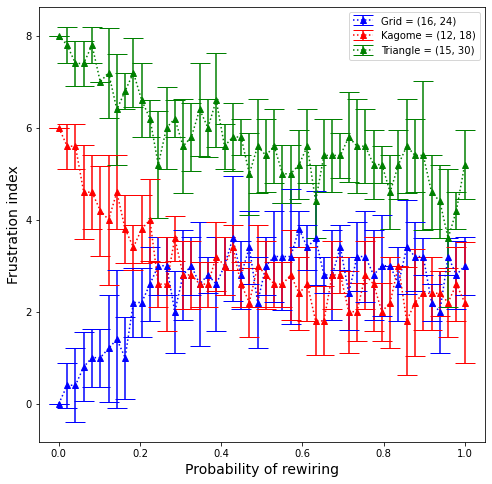

In [77]:
from matplotlib.legend_handler import HandlerLine2D

P = np.linspace(0,1)
fig, ax = plt.subplots(figsize=[8,8])
ax1 = ax.errorbar([p for p in P], [i for i,j in grid_data], [j for i,j in grid_data], ls='dotted', marker='^',capsize=10,color="blue",label='Grid = ('+str(grid_node)+", "+str(grid_edge)+")")
ax2 = ax.errorbar([p for p in P], [i for i,j in kagome_data], [j for i,j in kagome_data], ls='dotted', marker='^',capsize=10,color="red",label='Kagome = ('+str(kagome_node)+", "+str(kagome_edge)+")")
ax3 = ax.errorbar([p for p in P], [i for i,j in triangle_data], [j for i,j in triangle_data], ls='dotted', marker='^',capsize=10,color="green",label='Triangle = ('+str(triangle_node)+", "+str(triangle_edge)+")")

plt.xlabel('Probability of rewiring', fontsize=14)
plt.ylabel('Frustration index', fontsize=14)
#ax.set_ylim((0,1))
ax.legend(loc="upper right")
plt.show()

In [154]:
d1,v1,e1 = Rewiring_Fuction("Grid",10,10, repeat = 5, k=1.0,color="blue")

Number of Nodes: 100
Number of Edges: 180
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

In [155]:
d2,v2,e2 = Rewiring_Fuction("Kagome",5,5, repeat = 5, k=1.0,color="blue")

Number of Nodes: 116
Number of Edges: 210
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

In [159]:
d3,v3,e3 = Rewiring_Fuction("Triangle",11,11, repeat = 5, k=1.0,color="blue")

Number of Nodes: 78
Number of Edges: 198
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

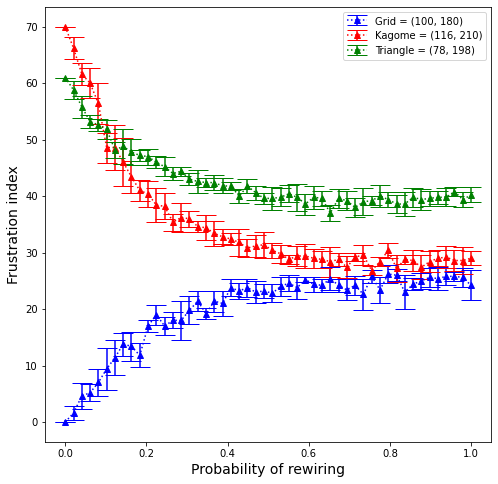

In [160]:
P = np.linspace(0,1)
fig, ax = plt.subplots(figsize=[8,8])
ax1 = ax.errorbar([p for p in P], [i for i,j in d1], [j for i,j in d1], ls='dotted', marker='^',capsize=10,color="blue",label='Grid = ('+str(v1)+", "+str(e1)+")")
ax2 = ax.errorbar([p for p in P], [i for i,j in d2], [j for i,j in d2], ls='dotted', marker='^',capsize=10,color="red",label='Kagome = ('+str(v2)+", "+str(e2)+")")
ax3 = ax.errorbar([p for p in P], [i for i,j in d3], [j for i,j in d3], ls='dotted', marker='^',capsize=10,color="green",label='Triangle = ('+str(v3)+", "+str(e3)+")")

plt.xlabel('Probability of rewiring', fontsize=14)
plt.ylabel('Frustration index', fontsize=14)
#ax.set_ylim((0,1))
ax.legend(loc="upper right")
plt.show()

In [161]:
da,va,ea = Rewiring_Fuction("Grid",20,20, repeat = 5, k=1.0,color="blue")

Number of Nodes: 400
Number of Edges: 760
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 

KeyboardInterrupt: 

# some graph plots

12 18
12 18


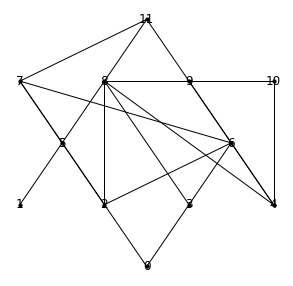

In [31]:
size=1

n=size;m=size
option="Kagome"

G,pos = Choose_Graph(option,n,m)

print(len(G.nodes()),len(G.edges()))

G = Rewire_Grid(option,G,1)

G = Add_Weights(G,0.5)

signed_matrix0 = nx.to_numpy_matrix(G)

fig, ax = plt.subplots(figsize=(5,5))
nx.draw(G,pos,node_size=10,node_color="black",with_labels=True)

print(len(G.nodes()),len(G.edges()))

16 24
16 24


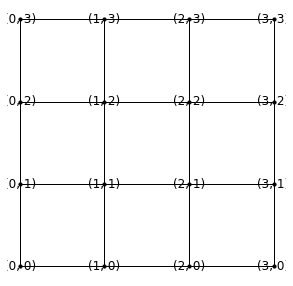

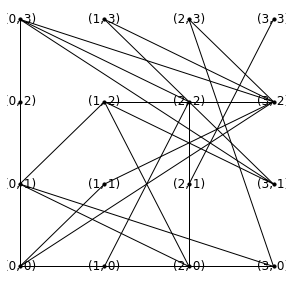

In [51]:
size=4

n=size;m=size
option="Grid"

G,pos = Choose_Graph(option,n,m)

fig, ax = plt.subplots(figsize=(5,5))
nx.draw(G,pos,node_size=10,node_color="black",with_labels=True)


print(len(G.nodes()),len(G.edges()))

G = Rewire_Grid(option,G,1)

G = Add_Weights(G,0.5)

signed_matrix0 = nx.to_numpy_matrix(G)

fig, ax = plt.subplots(figsize=(5,5))
nx.draw(G,pos,node_size=10,node_color="black",with_labels=True)

print(len(G.nodes()),len(G.edges()))

21
after rewire 21


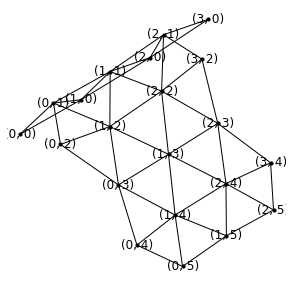

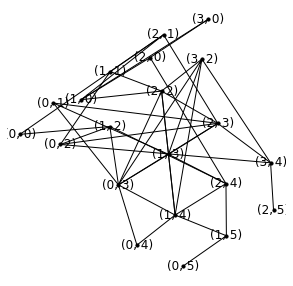

In [64]:
size = 5

G = nx.triangular_lattice_graph(size,size)

pos=nx.spring_layout(G, weight=None)

print(len(G.nodes()))

fig, ax = plt.subplots(figsize=(5,5))
nx.draw(G,pos,node_size=10,node_color="black",with_labels=True)

G = Rewire_Grid("Triangle",G,0.5)

print("after rewire",len(G.nodes()))

fig, ax = plt.subplots(figsize=(5,5))
nx.draw(G,pos,node_size=10,node_color="black",with_labels=True)